In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [ ]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species'] 
df = pd.read_csv('/content/drive/MyDrive/Data Science Internship/LGM/iris.data', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.nunique()

Sepal length    35
Sepal width     23
Petal length    43
Petal width     22
Species          3
dtype: int64

In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Analysing the Dataset**

In [ ]:
df.columns

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Species'],
      dtype='object')

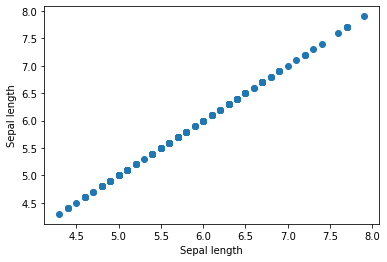

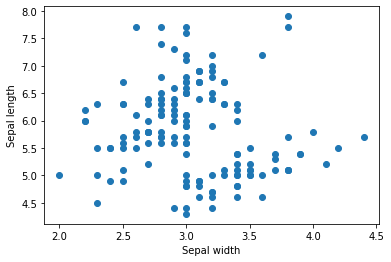

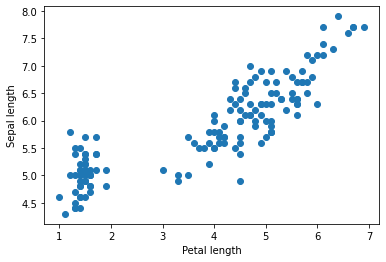

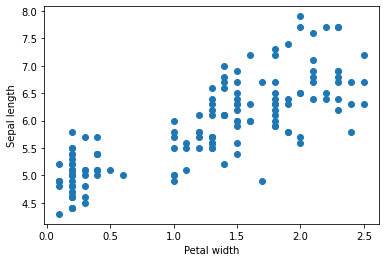

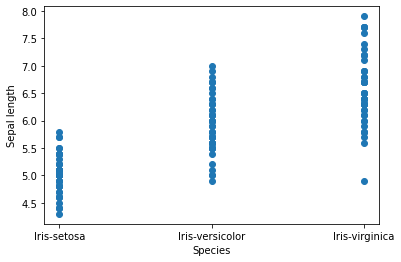

In [ ]:
for i in df.columns:
    plt.scatter(df[str(i)],df['Sepal length'])
    plt.xlabel(i)
    plt.ylabel("Sepal length")
    plt.show()

**Conclusion:** The plot doesnot convey much information about the nature of distribution of the sepal length vs sepal width. Hence, we would use different colours(based on their class type) to interpret the distribution nature.

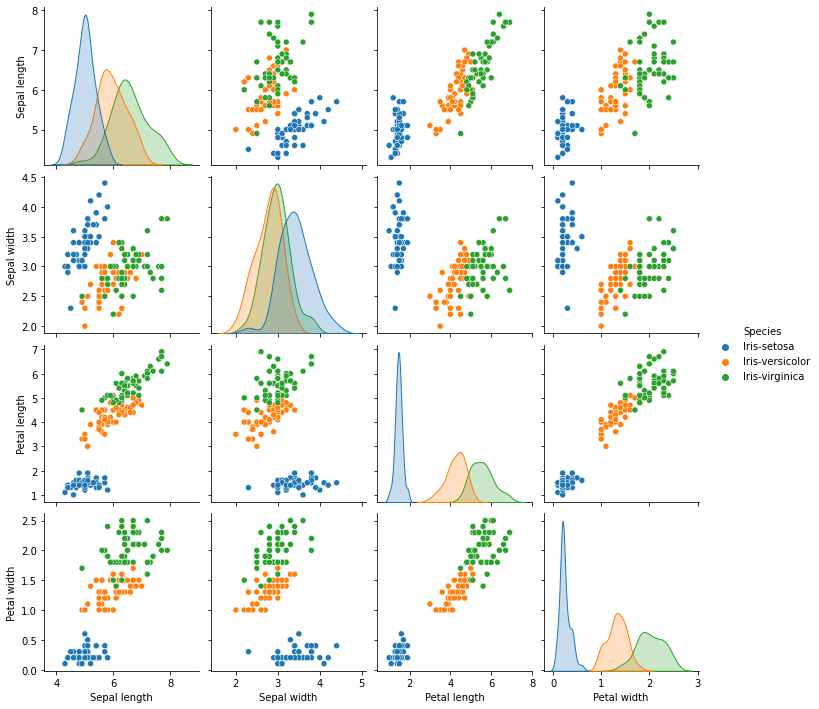

In [ ]:
sns.pairplot(df, hue ='Species')

Inferences


1.  Iris-Setosa can be easily differentiated
2. Iris-Versicolor and Iris-Virginica are overlaping in most of the plot, making it difficult for us to differentiate
3. The graph of Petal Length vs Petal Width shows us the best result that can be used to segregate Iris-Versicolor and Iris-Virginica






In [ ]:
df.corr()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


**Plotting the correlation using a heatmap**

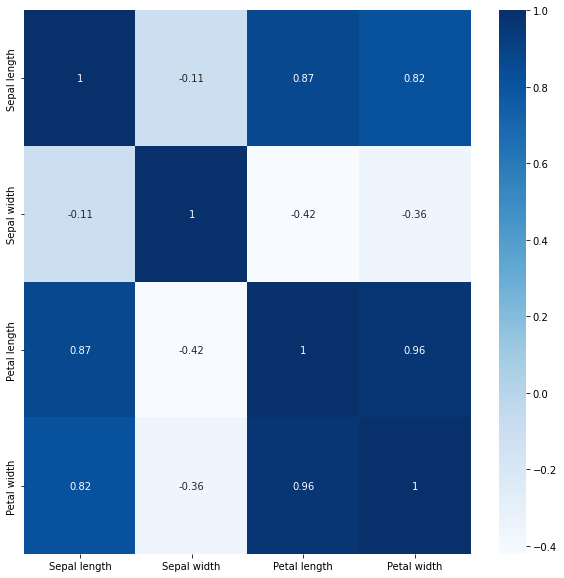

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap='Blues',annot = True)

Conclusion:

1.   From the graph, it can be clearly seen that the columns Petal length and petal width hold a strong correlation (=0.96). Earlier we had got the same observations while plotting a pairplot.
2.   Apart from this, the columns Sepal length and Petal length also hold a high corelation(=0.87).
3. Sepal length and Petal width alzo hold a good correlation (=0.82).



**Observing the distribution nature of all the 4 columns (Using a Distplot)**

In [ ]:
df.columns

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Species'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

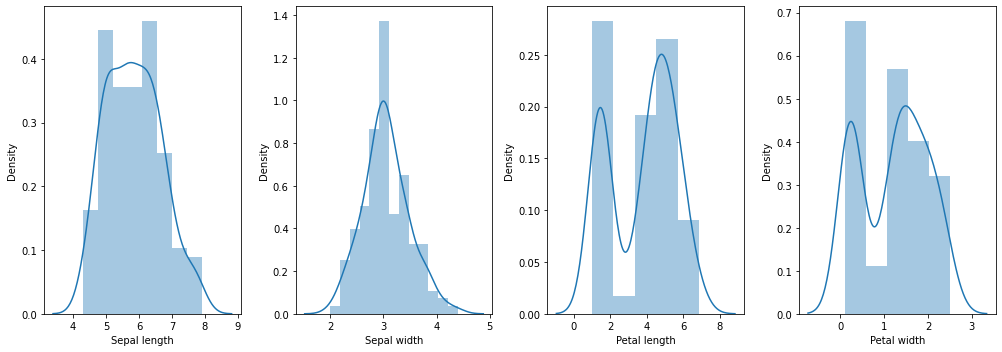

In [ ]:
col = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
plt.figure(figsize=(35,5))
i = 1
for e in col:
    plt.subplot(1,10,i)
    sns.distplot(df[e])
    i = i + 1
plt.tight_layout()
plt.show()

Conclusion: 
            It can be observed from the above distplots that the distribution of the columns follow a Normal distribution

**Observing the distribution of the data across the various columns using a Histogram**

In [ ]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


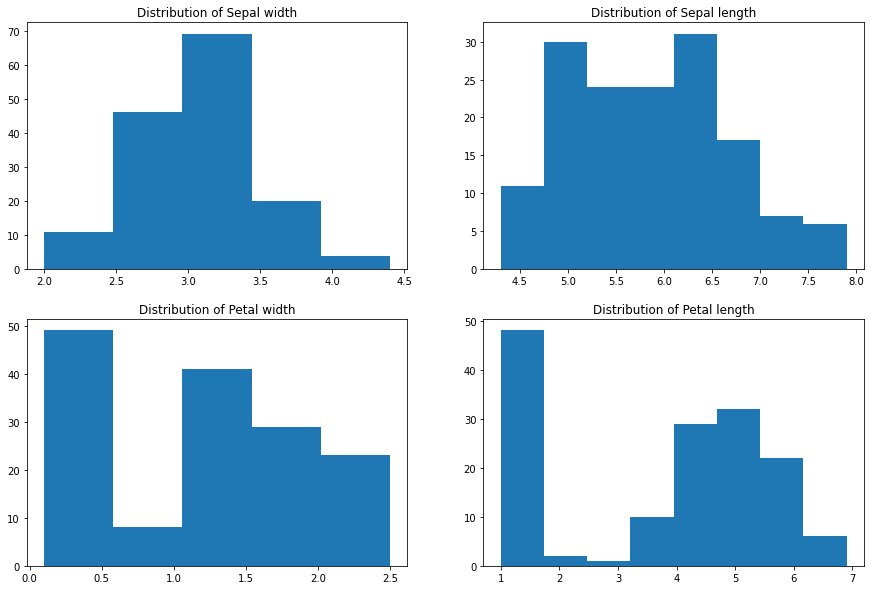

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes[0,0].set_title("Distribution of Sepal width")
axes[0,0].hist(df['Sepal width'], bins=5);
axes[0,1].set_title("Distribution of Sepal length")
axes[0,1].hist(df['Sepal length'], bins=8);
axes[1,0].set_title("Distribution of Petal width")
axes[1,0].hist(df['Petal width'], bins=5);
axes[1,1].set_title("Distribution of Petal length")
axes[1,1].hist(df['Petal length'], bins=8)
plt.show()

Conclusions:


*  The highest frequency of Sepal length ranges between 6.0 - 6.5 which is around 32
* The highest frequency of Sepal Width ranges between 3.0 - 3.5 which is around 69

*  The highest frequency of Petal length ranges between 1.0 - 1.8 which is around 50
*   The highest frequency of Petal Width ranges between 0.0 - 0.5 which is around 50





**Univariate Analysis of all the 4 columns(using Distplots)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

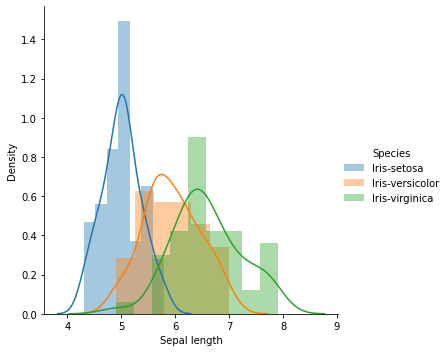

In [ ]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"Sepal length").add_legend()

Conclusion:
It can be clearly seen that the flower species cannot be seperated based on the Sepal length as the values overlap a lot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

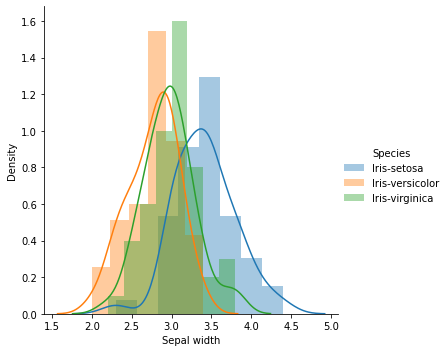

In [ ]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"Sepal width").add_legend()

Conclusion:
It can be clearly seen that the flower species cannot be seperated based on the Sepal Width as here also, the values overlap a lot. the overlapping is more intense in this case as compared to the overlapping in the case of Sepal Length.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

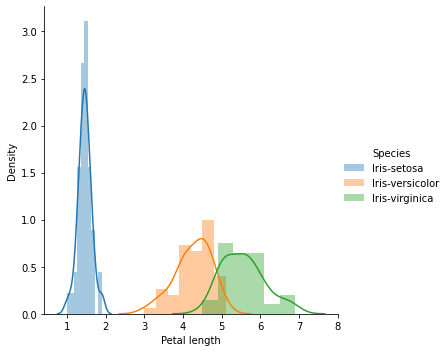

In [ ]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"Petal length").add_legend()

Conclusion:
From the graph, it can be seen that Setosa is easily segregable, whereas Versicolor and Virginica do overlap at some points (near 4.5-5). The column Petal length can be used to seperate the species

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

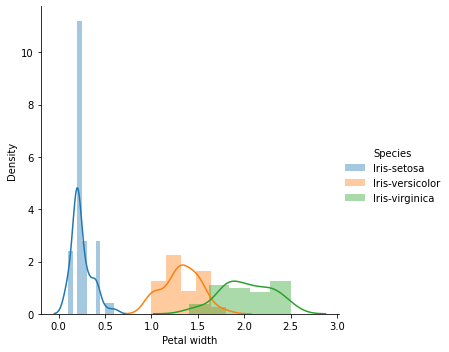

In [ ]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"Petal width").add_legend()

Conclusion:  
 From the graph, it can be seen that Setosa is easily segregable, whereas Versicolor and Virginica do overlap at some points (near 1.5-2.0). The column Petal Width can also be used to seperate the species .

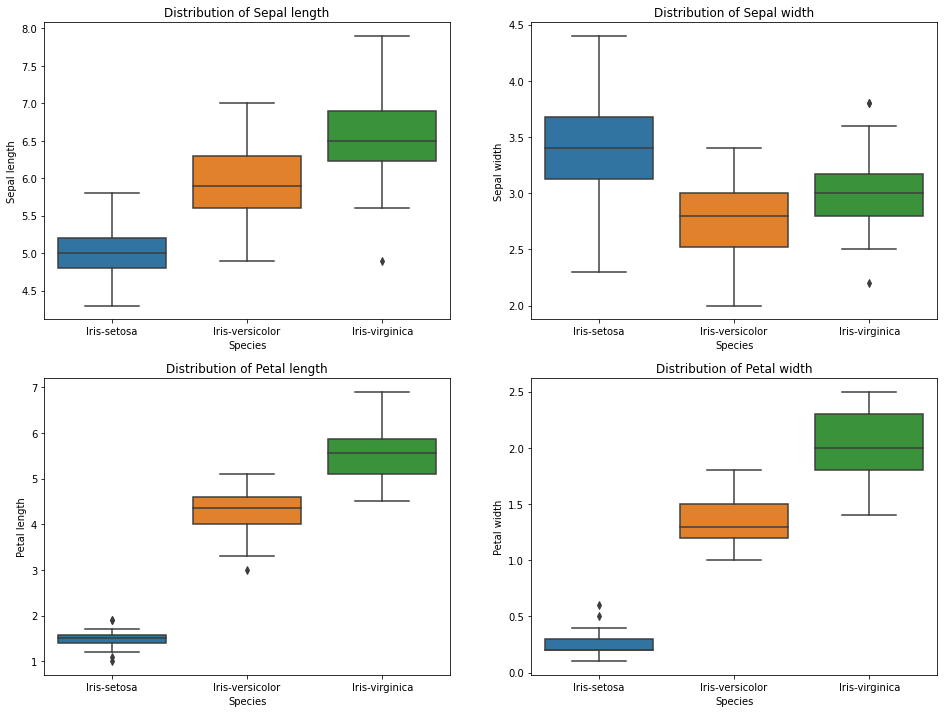

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal length")
sns.boxplot(y="Sepal length", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal width")
sns.boxplot(y="Sepal width", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal length")
sns.boxplot(y="Petal length", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal width")
sns.boxplot(y="Petal width", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

Conclusions:
We can see that the species Setosa doesnot have any outliers in case of Sepal Length or Sepal Width, however, it does have few outliers in Petal length and Petal Width. In terms of features like: Petal Width / Length, Virginca has quiet high values as compared to the other two species. Also, Setosa has the least values for the same features. It is also observed that for the feature Sepal Width, Setosa has a wide range of values as compared to the other species

**Let's Dive a lil Deeper !!**
To furthur analyze the distribution we are using a violin plot.

Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group's density curve can be compared to see where groups are similar or different.

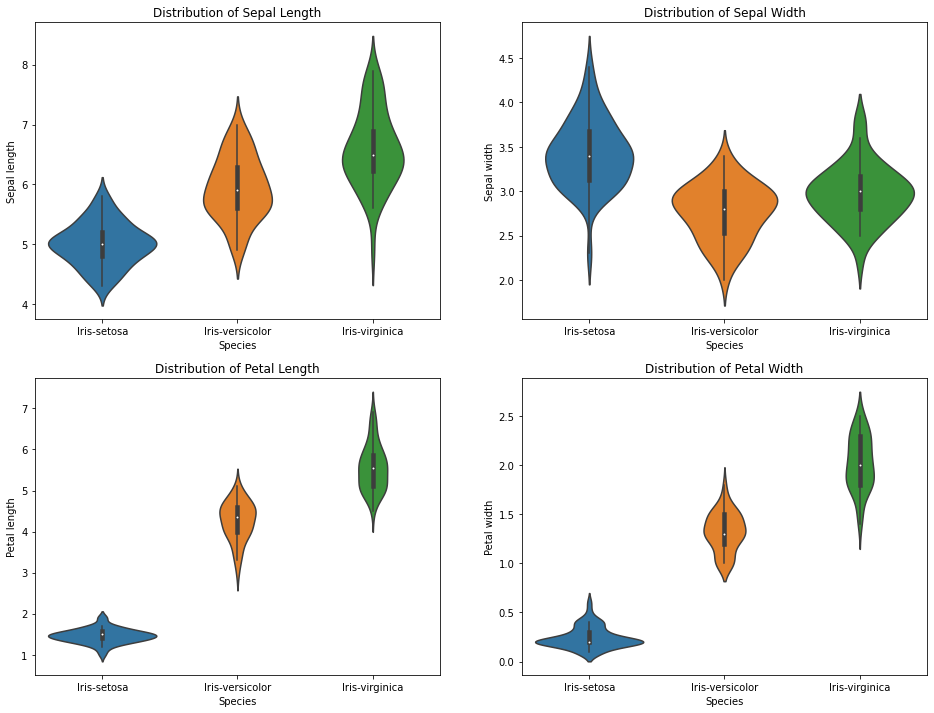

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.violinplot(y="Sepal length", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.violinplot(y="Sepal width", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal Length")
sns.violinplot(y="Petal length", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal Width")
sns.violinplot(y="Petal width", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

Conclusions:
The kernel density in the Violin plots helps us understand the full distribution of the data in terms of density.

Final Conclusions

*  The dataset is completely balanced i.e. equal number of records are present for each of the three species.
*   Here our target column is Species, as we need to segregate the flowers as per their species based on the 4 fetaures namely, Sepal Length, Sepal Width, Petal Length and Petal Width .
*   The columns Petal length and petal width hold a strong correlation (=0.96) and can be used to segregate the flowers.
*   By plotting various graphs, we can conclude that:
*   The Setosa species is easily segregable because of its small feature value range.
*   The Versicolor and Virginca species are a bit difficult to seperate because they overlap at many points in terms of their features.







**Thank You**